<a href="https://colab.research.google.com/github/tnoda/cibook-py/blob/master/cibook_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第1章


## (1) パッケージのインストール



In [0]:
pass

## (2) ライブラリの読み込み

In [0]:
import pandas as pd

## (3) データの読み込み


In [0]:
df = pd.read_csv("http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
recency            64000 non-null int64
history_segment    64000 non-null object
history            64000 non-null float64
mens               64000 non-null int64
womens             64000 non-null int64
zip_code           64000 non-null object
newbie             64000 non-null int64
channel            64000 non-null object
segment            64000 non-null object
visit              64000 non-null int64
conversion         64000 non-null int64
spend              64000 non-null float64
dtypes: float64(2), int64(6), object(4)
memory usage: 5.9+ MB


,recency,history,mens,womens,newbie,visit,conversion,spend
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781,0.009031,1.050908
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890,0.094604,15.036448
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000


In [0]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


## (4) データの準備

In [0]:
df.loc[:, 'treatment'] = df['segment'].map(lambda x: 1 if x == 'Mens E-Mail' else 0)
male_df = df.loc[df['segment'] != 'Womens E-Mail']
male_df.info()
male_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42613 entries, 1 to 63999
Data columns (total 13 columns):
recency            42613 non-null int64
history_segment    42613 non-null object
history            42613 non-null float64
mens               42613 non-null int64
womens             42613 non-null int64
zip_code           42613 non-null object
newbie             42613 non-null int64
channel            42613 non-null object
segment            42613 non-null object
visit              42613 non-null int64
conversion         42613 non-null int64
spend              42613 non-null float64
treatment          42613 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 4.6+ MB


,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,treatment
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0,1
13,2,2) $100 - $200,101.64,0,1,Urban,0,Web,Mens E-Mail,1,0,0.0,1
14,4,3) $200 - $350,241.42,0,1,Rural,1,Multichannel,No E-Mail,0,0,0.0,0


## (5) 集計による比較

In [0]:
male_df.groupby('treatment').agg({'spend': 'mean', 'conversion': ['mean', 'count']})

spend conversion       
               mean       mean  count
treatment                            
0          0.652789   0.005726  21306
1          1.422617   0.012531  21307

## (6) t検定を行う

(a) 男性向けメールが配信されたグループの購買データを得る。

count    21307.000000
mean         1.422617
std         17.754205
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        499.000000
Name: spend, dtype: float64

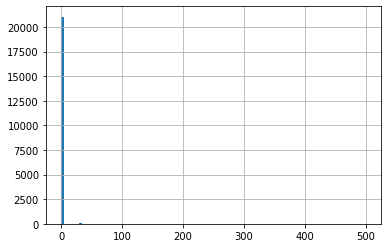

In [0]:
mens_mail = male_df.loc[male_df['treatment'] == 1, 'spend']
mens_mail.hist(bins=100)
mens_mail.describe()

(b) メールが配信されなかったグループの購買データを得る。

count    21306.000000
mean         0.652789
std         11.588200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        499.000000
Name: spend, dtype: float64

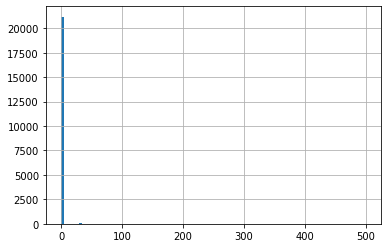

In [0]:
no_mail = male_df.loc[male_df['treatment'] == 0, 'spend']
no_mail.hist(bins=100)
no_mail.describe()

上の (a), (b) の平均の差に対して有意差検定を実行。

In [0]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans


rct_ttest = CompareMeans(DescrStatsW(mens_mail), DescrStatsW(no_mail))
rct_ttest.ttest_ind()  # defaults two-sided, pooled
rct_ttest.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.7698,0.145,5.300,0.000,0.485,1.055


## (7) セレクションバイアスのあるデータの作成

In [0]:
def bias(s):
  loyal = s['history'] > 300 or s['recency'] < 3 or s['channel'] == 'Multichannel'
  if (s['treatment'] == 1 and not loyal) or (s['treatment'] == 0 and loyal):
    return 0.5
  else:
    return 1.0


biased_data = male_df.sample(frac=0.75, weights=male_df.apply(bias, axis=1), random_state=42)
biased_data.info()
biased_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31960 entries, 24106 to 49857
Data columns (total 13 columns):
recency            31960 non-null int64
history_segment    31960 non-null object
history            31960 non-null float64
mens               31960 non-null int64
womens             31960 non-null int64
zip_code           31960 non-null object
newbie             31960 non-null int64
channel            31960 non-null object
segment            31960 non-null object
visit              31960 non-null int64
conversion         31960 non-null int64
spend              31960 non-null float64
treatment          31960 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 3.4+ MB


,recency,history,mens,womens,newbie,visit,conversion,spend,treatment
count,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000,31960.000000
mean,5.751627,241.948550,0.550344,0.551439,0.502096,0.146402,0.009637,1.115278,0.492272
std,3.508254,257.929171,0.497467,0.497355,0.500003,0.353514,0.097696,15.730681,0.499948
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,63.907500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,156.085000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,324.485000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,3215.970000,1.000000,1.000000,1.000000,1.000000,1.000000,499.000000,1.000000


(8) セレクションバイアスのあるデータで平均を比較

In [0]:
biased_data.groupby('treatment').agg({'spend': 'mean', 'conversion': ['mean', 'count']})

spend conversion       
               mean       mean  count
treatment                            
0          0.609540   0.005670  16227
1          1.636894   0.013729  15733

(9) Statsmodels のクラスである `CompareMeans` を使って t検定を行う(Biased)

(a) 男性向けメールが配信されたグループの購買データを得る。

count    15733.000000
mean         1.636894
std         19.459376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        499.000000
Name: spend, dtype: float64

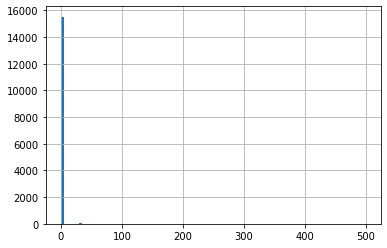

In [0]:
mens_mail_biased = biased_data.loc[biased_data['treatment'] == 1, 'spend']
mens_mail_biased.hist(bins=100)
mens_mail_biased.describe()

(b) メールが配信されなかったグループの購買データを得る

count    16227.00000
mean         0.60954
std         10.94220
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max        499.00000
Name: spend, dtype: float64

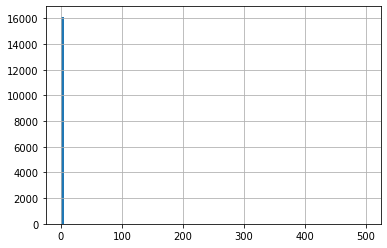

In [0]:
no_mail_biased = biased_data.loc[biased_data['treatment'] == 0, 'spend']
no_mail_biased.hist(bins=100)
no_mail_biased.describe()

(a)(b)の平均の差に対して有意差検定を実行

In [0]:
rct_ttest_biased = CompareMeans(DescrStatsW(mens_mail_biased), DescrStatsW(no_mail_biased))
rct_ttest_biased.ttest_ind()  # defaults two-sided, pooled
rct_ttest_biased.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,1.0274,0.176,5.840,0.000,0.683,1.372


# 余談

この場合だと，コンバージョンが上がったことを検定するまでもないですが，念のために確認します。

In [0]:
from statsmodels.stats.contingency_tables import Table2x2


ct = Table2x2(pd.crosstab(male_df['treatment'], df['conversion']))
ct.summary()

,Estimate,SE,LCB,UCB,p-value
Odds ratio,2.204,,1.777,2.732,0.000
Log odds ratio,0.790,0.110,0.575,1.005,0.000
Risk ratio,1.007,,1.005,1.009,0.000
Log risk ratio,0.007,0.001,0.005,0.009,0.000


In [0]:
chi2_test = ct.test_nominal_association()
print(chi2_test)

df          1
pvalue      1.5232259897857148e-13
statistic   54.53991486246349


数万人に対して $0.5$% 程度のコンバージョンが倍になっている e メール施策なので効果無い訳ないのは当然なので，どちらかというと検定より，費用対効果確認したいですね。

客単価どうなっているか念のために見てみましょう。

count    122.000000
mean     114.002705
std      103.031052
min       29.990000
25%       35.040000
50%       88.365000
75%      146.170000
max      499.000000
Name: spend, dtype: float64

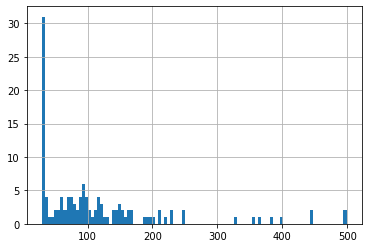

In [0]:
t0_spend = male_df.loc[(male_df['treatment'] == 0) & (male_df['spend'] > 0), 'spend']
t0_spend.hist(bins=100)
t0_spend.describe()

count    267.000000
mean     113.526929
std      111.682812
min       29.990000
25%       29.990000
50%       66.980000
75%      152.720000
max      499.000000
Name: spend, dtype: float64

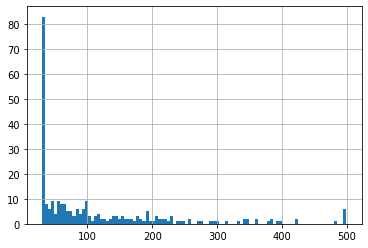

In [0]:
t1_spend = male_df.loc[(male_df['treatment'] == 1) & (male_df['spend'] > 0), 'spend']
t1_spend.hist(bins=100)
t1_spend.describe()

まあ，なんというか微妙